In [1]:
# Simulate a small set of stock data for "AAPL" and "MSFT", over 10 days
# NOT A REAL DATA

import pandas as pd
import numpy as np

In [3]:
dates = pd.date_range(start="2023-01-01",periods=10)
print(dates)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


In [4]:
# Simultae stock data

data = {
    "Date": np.tile(dates,2), # Repeat dates for each tikcer
    "Ticker":["AAPL"]*10 + ["MSFT"]*10,
    "Open":np.random.uniform(150,200,20),
    "High":np.random.uniform(200,250,20),
    "Low":np.random.uniform(100,150,20),
    "Close":np.random.uniform(150,200,20),
    "Volume":np.random.randint(1e6, 5e6, 20),
}

stocks_df = pd.DataFrame(data)
print(stocks_df)

         Date Ticker        Open        High         Low       Close   Volume
0  2023-01-01   AAPL  172.894493  203.107057  119.162075  182.005286  3039751
1  2023-01-02   AAPL  197.940348  224.316759  132.836170  175.618270  4424580
2  2023-01-03   AAPL  191.313283  212.006911  106.810750  187.968218  4207335
3  2023-01-04   AAPL  195.854579  241.398503  144.870957  196.976447  2100507
4  2023-01-05   AAPL  159.036766  228.111206  112.812031  181.008954  1644044
5  2023-01-06   AAPL  192.034055  233.677307  114.750378  158.652733  2711557
6  2023-01-07   AAPL  172.782672  238.841786  103.829336  154.986312  4204169
7  2023-01-08   AAPL  177.363244  242.502310  149.229966  175.671615  4600241
8  2023-01-09   AAPL  182.083977  224.024408  112.211535  193.945968  2360420
9  2023-01-10   AAPL  175.856194  242.736930  102.390910  155.782273  4384313
10 2023-01-01   MSFT  172.606197  210.683988  113.429549  175.256639  2990812
11 2023-01-02   MSFT  178.261286  246.357729  130.564500  155.64

In [5]:
# Calculating Daily Price Change
stocks_df["PriceChange"] = stocks_df["Close"] - stocks_df["Open"]
print(stocks_df.head())

        Date Ticker        Open        High         Low       Close   Volume  \
0 2023-01-01   AAPL  172.894493  203.107057  119.162075  182.005286  3039751   
1 2023-01-02   AAPL  197.940348  224.316759  132.836170  175.618270  4424580   
2 2023-01-03   AAPL  191.313283  212.006911  106.810750  187.968218  4207335   
3 2023-01-04   AAPL  195.854579  241.398503  144.870957  196.976447  2100507   
4 2023-01-05   AAPL  159.036766  228.111206  112.812031  181.008954  1644044   

   PriceChange  
0     9.110793  
1   -22.322078  
2    -3.345065  
3     1.121868  
4    21.972188  


In [6]:
# Compute 7-day Moving Average
stocks_df["7DayMa"] = stocks_df.groupby("Ticker")["Close"].transform(lambda x: x.rolling(window=7,min_periods=1).mean())

In [9]:
stocks_df[["Ticker","PriceChange","7DayMa"]]

,Ticker,PriceChange,7DayMa
0,AAPL,9.110793,182.005286
1,AAPL,-22.322078,178.811778
2,AAPL,-3.345065,181.863924
3,AAPL,1.121868,185.642055
4,AAPL,21.972188,184.715435
5,AAPL,-33.381322,180.371651
6,AAPL,-17.796360,176.745174
7,AAPL,-1.691629,175.840364
8,AAPL,11.861991,178.458607
9,AAPL,-20.073921,173.860614


In [12]:
# Identify Trading Volume Spikes
avg_volume = stocks_df.groupby("Ticker")["Volume"].transform("mean")

# more than 20% it's a spike
stocks_df["VolumeSpike"] = stocks_df["Volume"] > (1.2* avg_volume) # boolean_mask almost

print(stocks_df["VolumeSpike"])

0     False
1      True
2      True
3     False
4     False
5     False
6      True
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17    False
18     True
19    False
Name: VolumeSpike, dtype: bool


In [13]:
volume_spikes_df = stocks_df[stocks_df["VolumeSpike"]]
print(volume_spikes_df)

         Date Ticker        Open        High         Low       Close   Volume  \
1  2023-01-02   AAPL  197.940348  224.316759  132.836170  175.618270  4424580   
2  2023-01-03   AAPL  191.313283  212.006911  106.810750  187.968218  4207335   
6  2023-01-07   AAPL  172.782672  238.841786  103.829336  154.986312  4204169   
7  2023-01-08   AAPL  177.363244  242.502310  149.229966  175.671615  4600241   
9  2023-01-10   AAPL  175.856194  242.736930  102.390910  155.782273  4384313   
14 2023-01-05   MSFT  157.246957  207.685322  111.012312  187.185888  4298067   
16 2023-01-07   MSFT  157.887264  237.812757  109.580936  167.804197  4787405   
18 2023-01-09   MSFT  188.350745  214.619136  124.321312  155.722667  4847678   

    PriceChange      7DayMa  VolumeSpike  
1    -22.322078  178.811778         True  
2     -3.345065  181.863924         True  
6    -17.796360  176.745174         True  
7     -1.691629  175.840364         True  
9    -20.073921  173.860614         True  
14    29.938

In [14]:
# Visualise data 
import matplotlib.pyplot as plt 

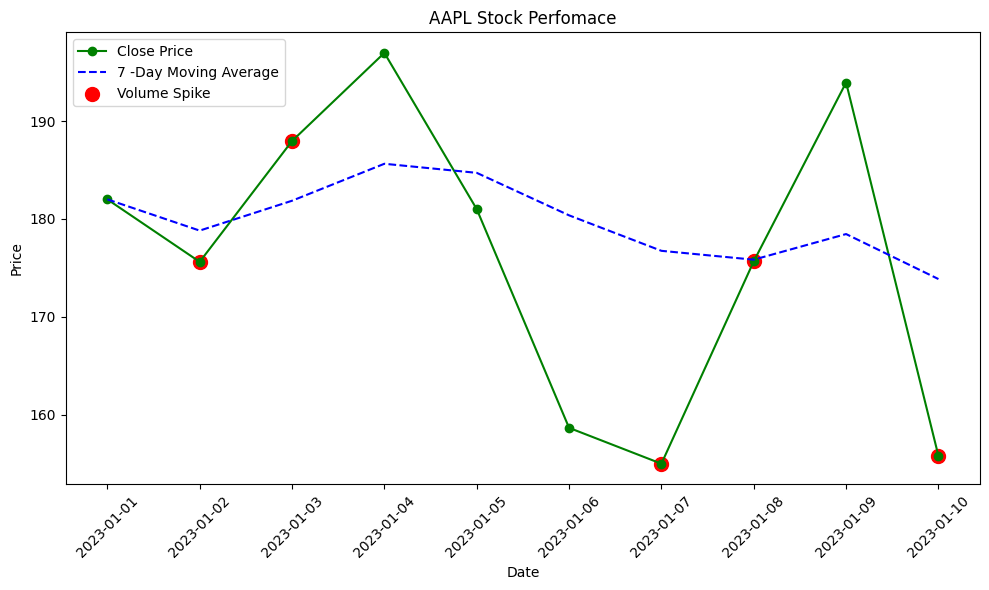

5


In [23]:

aapl_df = stocks_df[stocks_df["Ticker"] == "AAPL"]

# line for closing price and 7-day moving average

plt.figure(figsize=(10,6))
date = aapl_df["Date"]
closing_price = aapl_df["Close"]
MA7 = aapl_df["7DayMa"]

plt.plot(date,closing_price, label = "Close Price", marker = 'o',color="green")
plt.plot(date,MA7,label = "7 -Day Moving Average", linestyle="--",color = "blue")


# highlight volume spikes
volume_spike_dates = aapl_df[aapl_df["VolumeSpike"]]["Date"]
plt.scatter(volume_spike_dates,aapl_df[aapl_df["VolumeSpike"]]["Close"],s=100,label = "Volume Spike",color="red")


plt.title("AAPL Stock Perfomace")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

print(aapl_df['VolumeSpike'].sum())